In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Keras imports
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def load_train_data(dir):

  datagen = ImageDataGenerator(rescale=1./255)
  generator = datagen.flow_from_directory(
      dir,
      target_size=(224, 224),
      seed = 123,
      batch_size=32,
      class_mode="binary")
  return generator


In [12]:
whole_dir = '../hotdog-nothotdog/'

train_generator = load_train_data(whole_dir+'train')

Found 4242 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'hotdog': 0, 'nothotdog': 1}

In [14]:
# prompt: get an array for all images information from train_generato
file_paths = train_generator.filepaths
labels = train_generator.classes  # Assuming binary classification, 0 or 1

# Create DataFrame
data = {'file_path': file_paths, 'label': labels}
train_df = pd.DataFrame(data)

In [15]:
train_ds = image_dataset_from_directory(
    '../hotdog-nothotdog/train',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=32,
    subset = 'training',
    seed=123,
    validation_split=0.2,
    shuffle=True,
).map(lambda x,y: (x/255, y))


valid_ds = image_dataset_from_directory(
    '../hotdog-nothotdog/train',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=32,
    subset = 'validation',
    seed=123,
    validation_split=0.2,
    shuffle=True,
).map(lambda x,y: (x/255, y))


Found 4242 files belonging to 2 classes.
Using 3394 files for training.
Found 4242 files belonging to 2 classes.
Using 848 files for validation.


In [8]:
model = keras.models.Sequential([
    RandomFlip('horizontal_and_vertical', input_shape=(224, 224, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
hist = model.fit(train_ds, validation_data=valid_ds, epochs=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 89s 781ms/step - acc: 0.4965 - loss: 0.7821 - val_acc: 0.5094 - val_loss: 0.7303


In [10]:
model.save('../Models/yc_model_k.keras')

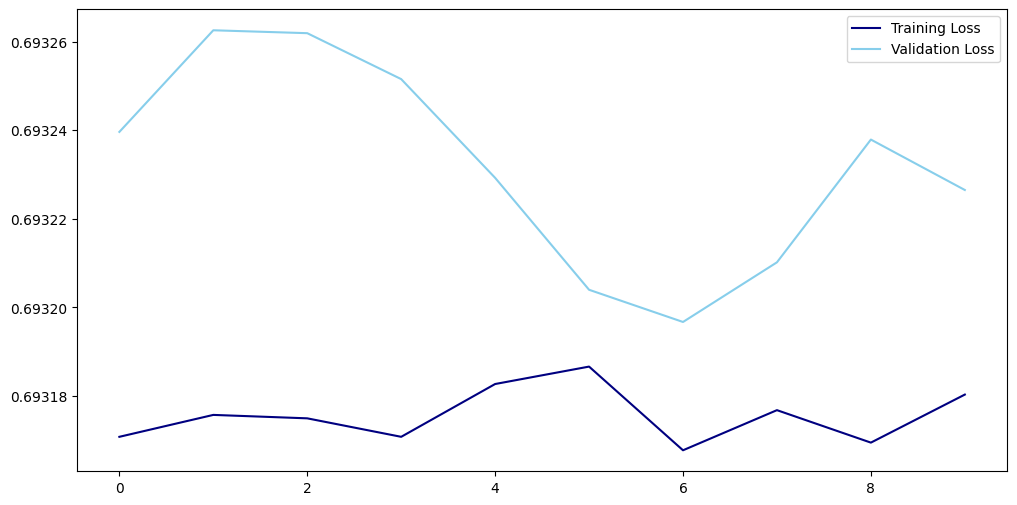

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], c='navy', label='Training Loss')
plt.plot(hist.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [ ]:
model.save("/content/yc_model.keras")

In [ ]:
model_json = model.to_json()

# Save model architecture to a JSON file
with open("/content/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import pickle

In [ ]:
with open('/content/yc_model.pkl', 'wb') as f:
    pickle.dump(model, f)